<h1>Testing the A matrices</h1>
We have the equations in the form: $$\mathbf{Ax}=\mathbf{b}$$ Here we test if the A are being created properly.

In [2]:
import sys
sys.path.insert(0,'../../source/')
import numpy as np
import mac3d
import matplotlib.pyplot as plt
%pylab inline
from sympy.tensor import Indexed, IndexedBase, Idx
from sympy import symbols, init_printing, Matrix, Symbol
init_printing()

Populating the interactive namespace from numpy and matplotlib


We first create a symbolic vector using the sympy module which will let us test the action of $\mathbf{A}$. We are working with $4 \times 4 \times 4$ velocity fields so we create a $64 \times 1$ vector, but we print only a few elements.

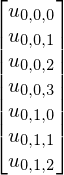

In [2]:
u = IndexedBase('u')
i, j, k = symbols('i j k', cls = Idx)

U = []
for l in range(4):
    for m in range(4):
        for n in range(4):
            U.append(u[l,m,n])
U = Matrix(U)
U[0:7,:]

Now we create the operators and visualize them using matplotlib. Subsequently we will check their action on U.

In [4]:
m = mac3d.Mac('default.yml')

[[ 5. -1.  0. -1.]
 [-1.  5. -1.  0.]
 [ 0. -1.  5. -1.]
 [-1.  0. -1.  5.]]


<matplotlib.colorbar.Colorbar instance at 0x7f761f9aa5f0>

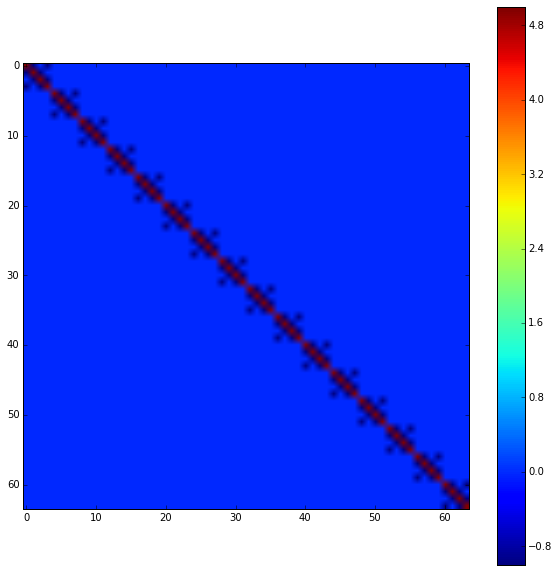

In [5]:
a1 = m.constructTriDiagOperator1(4,4,4,1,1,1).todense()

#Print one submatrix
print a1[0:4, 0:4]

#Display the whole matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(a1)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f761f73dab8>

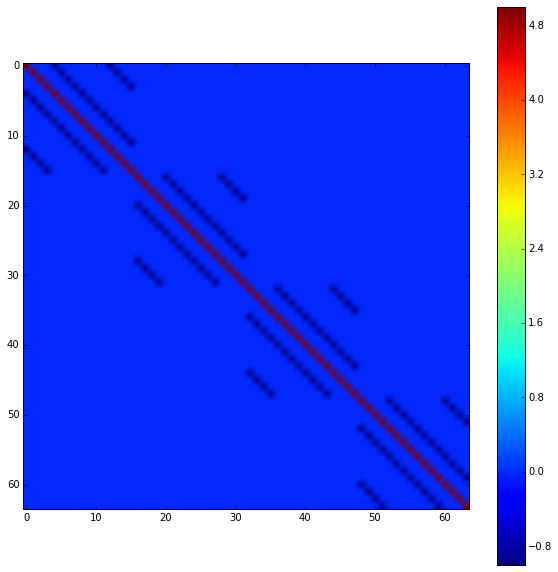

In [6]:
a2 = m.constructTriDiagOperator2(4,4,4,1,1,1).todense()

#Display the whole matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(a2)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f761f622680>

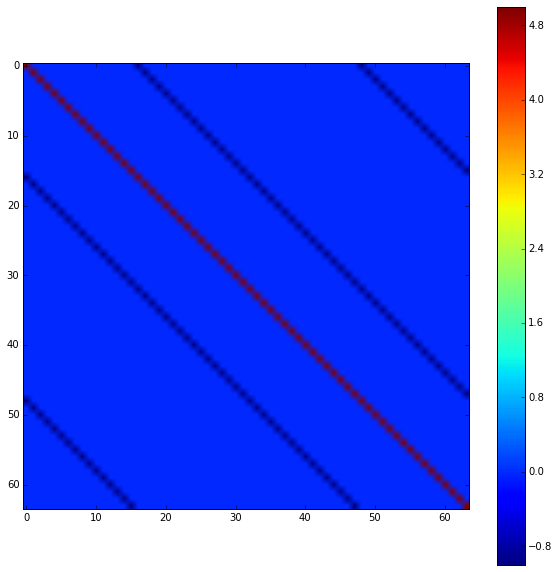

In [7]:
a3 = m.constructTriDiagOperator3(4,4,4,1,1,1).todense()

#Display the whole matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(a3)
plt.colorbar()

Finally we are ready to check the action of the operators on U.

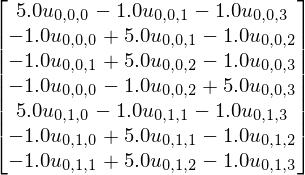

In [8]:
(a1*U)[0:7,:]

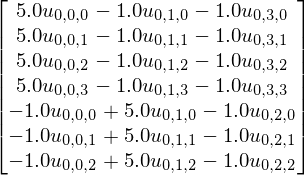

In [9]:
(a2*U)[0:7,:]

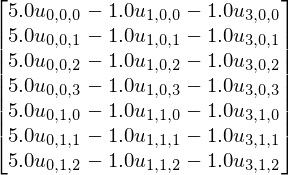

In [10]:
(a3*U)[0:7,:]

The operators seem to be woking properly.

<h1> Testing that the $\mathbf{b}$ vector is getting created properly </h1>

In [10]:
m = mac3d.Mac('default.yml')

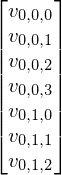

In [11]:
v = IndexedBase('v')
i, j, k = symbols('i j k', cls = Idx)

V = []
for l in range(4):
    for m in range(4):
        for n in range(4):
            V.append(v[l,m,n])
V = Matrix(V)
V[0:7,:]

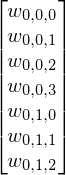

In [12]:
w = IndexedBase('w')
i, j, k = symbols('i j k', cls = Idx)

W = []
for l in range(4):
    for m in range(4):
        for n in range(4):
            W.append(w[l,m,n])
W = Matrix(W)
W[0:7,:]

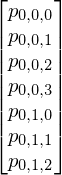

In [13]:
p = IndexedBase('p')
i, j, k = symbols('i j k', cls = Idx)

P = []
for l in range(4):
    for m in range(4):
        for n in range(4):
            P.append(p[l,m,n])
P = Matrix(P)
P[0:7,:]

In [16]:
reload(mac3d)
m = mac3d.Mac('default.yml')
m.xN = 4
m.yN = 4
m.zN = 4
m.dx = 1
m.dy = 1
m.dz = 1
m.nu = Symbol('nu')
m.rho = Symbol('rho')
m.beta = Symbol('beta')

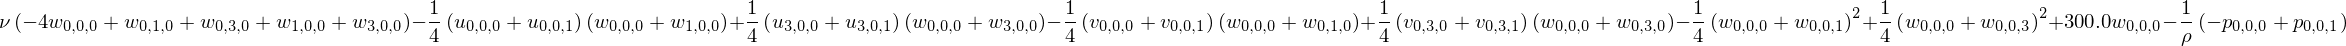

In [17]:
RHSx, RHSy, RHSz = m.constructRHSfirstThird(U, V, W ,P)
Matrix(RHSz)[0]

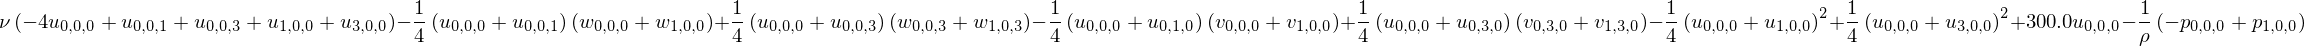

In [18]:
RHSx, RHSy, RHSz = m.constructRHSsecondThird(U, V, W ,P)
Matrix(RHSx)[0]

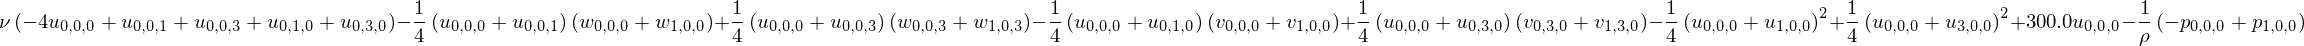

In [19]:
RHSx, RHSy, RHSz = m.constructRHSlastThird(U, V, W ,P)
Matrix(RHSx)[0]

<h1> Checking the velocity and pressure fields </h1>

In [3]:
from mpl_toolkits.mplot3d import axes3d

In [21]:
reload(mac3d)
m = mac3d.Mac('default.yml')

In [22]:
m.initializeMesh()
m.printMeshParameters()

>Mesh Parameters:
X-Range[xB xE]=[ 0 6.28318530718 ]
X-Mesh Width (Corrected) = 0.523598775598
X-Mesh Size = 12
Y-Range[yB yE]=[ 0 6.28318530718 ]
Y-Mesh Width (Corrected) = 0.523598775598
Y-Mesh Size = 12
Z-Range[zB zE]=[ 0 6.28318530718 ]
Z-Mesh Width (Corrected) = 0.5
Z-Mesh Size = 12
Time Range[tB tE]=[ 0 10 ]
Time Step (Corrected) = 0.01
Number of Time Steps= 1000


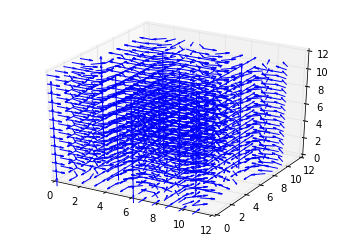

In [28]:
u = m.getVelocityX()
v = m.getVelocityY()
w = m.getVelocityZ()
x = range(m.xN)
y = range(m.yN)
z = range(m.zN)
x,y,z = np.meshgrid(x,y,z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(x,y,z,u,v,w)

<h1> Checking the stepper</h1> 

In [11]:
reload(mac3d)
m = mac3d.Mac('default.yml')
m.initializeMesh()

The exact solution is  x = 0                              
The exact solution is  x = 0                              
Time for 3RHS Calculation: 1.3503370285
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
Time for 3RHS Calculation: 1.32967710495
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
Time for 3RHS Calculation: 1.34858894348
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
Time for 3RHS Calculation: 1.35089707375
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
Time for 3R

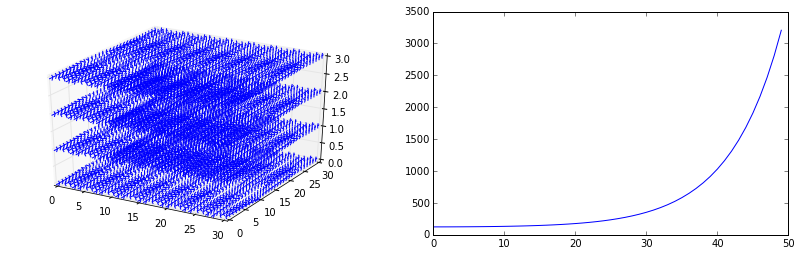

In [12]:
m.advanceBy(50)
u = m.getVelocityX()
v = m.getVelocityY()
w = m.getVelocityZ()
x = range(m.xN)
y = range(m.yN)
z = range(m.zN)
x,y,z = np.meshgrid(x,y,z)
fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(121, projection='3d')
ax.quiver(x,y,z,u,v,w)
ax = fig.add_subplot(122)
ax.plot(m.energy)

In [7]:
print m.nu

0
